In [1]:
# %%
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
directory_path = os.getcwd()
print("in directory: ",directory_path)
from matplotlib.pyplot import figure

in directory:  C:\Users\n368357\Downloads\results (5)


In [2]:
# get data corresponding to a model type
def get_data(model_type,shift):
    data_type = ["Kin8","CCPP","Naval_Propulsion","California_Housing","WineWhite","Exponential_Function"]
    # file where the plot will be stored
    df = {}

    if shift:
        shift_name = "with"
    else:
        shift_name = "without"

    # read the results
    for data in data_type:
        base_file_name = "/results/error_table_" + data + "_"
        df[data] = pd.read_csv(directory_path + base_file_name + model_type + '_' + shift_name +  ".csv",sep = ",")
    
    # the results in MVE are still tagged as Res-Gauss
    if model_type == "MVE_NN":
        [df[data].rename(columns = {"Res-Gauss":"MVE"},inplace = True) for data in data_type]

    return df

In [7]:
def get_best_algo(df,model_type,data_type,method_types,shift):
    output_filename = "results/best_algo_" + model_type + "_" + str(shift) + ".txt"  

    with open(output_filename,"w") as f:
        for data in data_type:
            temp_df = df[data].copy(deep = True)
            emp_covg = temp_df["emp coverage"]
            temp_df.drop(columns = ["emp coverage","tolerance"])
            min_error = 1000
       
            for method in method_types: 
                if (np.abs(temp_df[method] - emp_covg)[0] < min_error):
                    min_error= np.abs(temp_df[method] - emp_covg)[0]
                    best_method = method
               
            print('data:',data," ,best method",best_method," ,conservativeness: ", (temp_df[best_method]  < emp_covg)[0],file = f)

    
"""
## Plotting routine ##
"""

# %%
def plot_errors(model_type,shift):

    data_type = ["Kin8","CCPP","Naval_Propulsion","California_Housing","WineWhite"]
    data_ticks = ["K8","CCPP","NP","CH","WW"]
    df = get_data(model_type,shift)
    figure(figsize=(8, 6), dpi=80)
    base_markers = ["ko","bd","gs","rP","cv","m<","y>","bX"]
    
    if model_type == "NN" and (not shift):
        legends = ["CP-S","CP-CV","Res-Gauss","Emp"]
        markers = ["ko","bd","gs","rP"]
        names_model = legends[:]
        names_model[-1] = "emp coverage"
        title_name = "results for NN-1 (no shift)"
        output_filename = "results/"+ "without_shift_" + model_type + ".pdf"
    if model_type == "NN" and shift:
        legends = ["CP-SW","CP-CVW","CP-S","Res-Gauss","Emp"]
        markers = ["bX","y>","ko","gs","rP"]
        names_model = legends[:]
        names_model[-1] = "emp coverage"
        title_name = "results for NN-1 (with shift)"
        output_filename = "results/" + "with_shift_" + model_type + ".pdf"
    if model_type == "MVE_NN" and (not shift):
        legends = ["CP-S","CP-CV","MVE","Emp"]
        markers = ["ko","bd","gs","rP"]
        names_model = legends[:]
        names_model[-1] = "emp coverage"
        title_name = "results for NN-2 (no shift)"
        output_filename = "results/"+ "without_shift_" + model_type  + ".pdf"
    if model_type == "MVE_NN" and shift:
        legends = ["CP-SW","CP-CVW","CP-S","MVE","Emp"]
        names_model = legends[:]
        markers = ["bX","y>","ko","gs","rP"]
        names_model[-1] = "emp coverage"
        title_name = "results for NN-2 (with shift)"
        output_filename = "results/" + "with_shift_" + model_type + ".pdf"

    
    get_best_algo(df,model_type,data_type,legends[:-1],shift)

    leg_marker={k:v for k,v in zip(legends,markers)}
    size_marker = 10
    # locations on the x-axis where we plot the data
    id_data = np.linspace(-2,2,len(data_ticks))
      
    # over over the different data types
    for count_data,data in enumerate(data_type):
        # loop over the different methods
        for count_model, model in enumerate(legends):
            # we plot 1-data becuase data stores the coverage
            # alpha is the opatcity level of the markers
            if count_data == 0:
                plt.plot(id_data[count_data],1-df[data].iloc[0][names_model[count_model]],leg_marker[model],label = model,markersize = size_marker,alpha = 0.5)
            else:
                # dont add the label for all the other datapoints
                plt.plot(id_data[count_data],1-df[data].loc[0][names_model[count_model]],leg_marker[model],markersize = size_marker,alpha = 0.5)
        

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(id_data, data_ticks,rotation=25)
    plt.grid()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title('Results for ' + title_name)
    plt.ylabel('miss-coverages',fontsize = 15)
    plt.xlabel('datasets',fontsize = 15)
    plt.savefig(output_filename, bbox_inches='tight')



plotting for iid
--------------------------------------------------
plotting for covariate shift


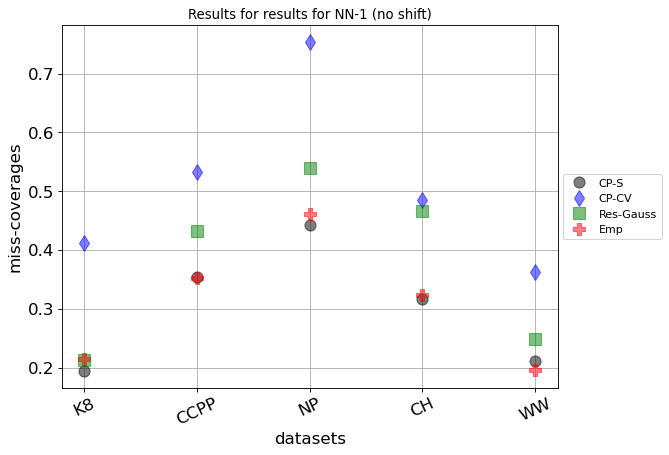

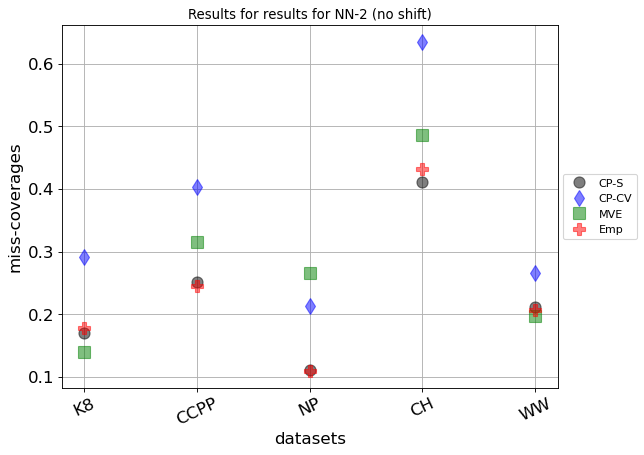

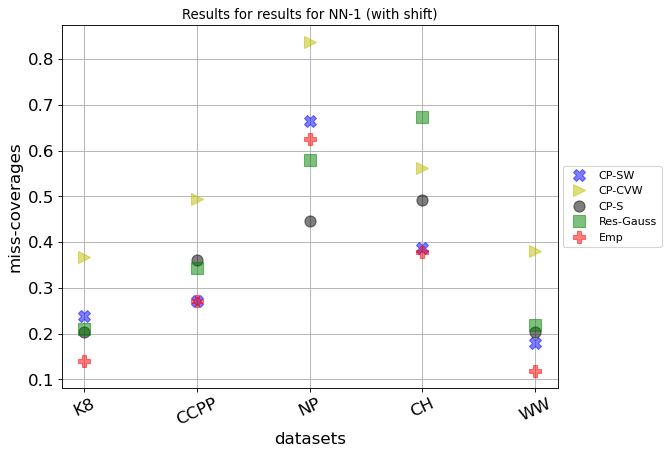

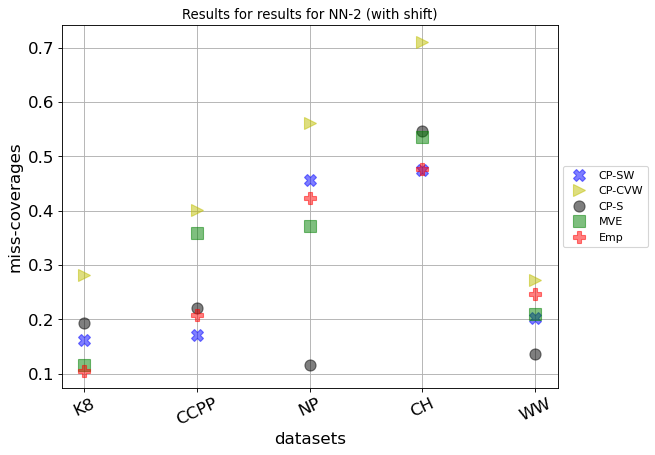

In [8]:
# %%
"""
## Results ##
"""
# %%
print('plotting for iid')
plot_errors(model_type = "NN",shift = False)
plot_errors(model_type = "MVE_NN",shift = False)
print('-'*50)
print('plotting for covariate shift')
plot_errors(model_type = "NN",shift = True)
plot_errors(model_type = "MVE_NN",shift = True)